In [1]:
import os
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d
#import ipywidgets as wdg  # Using the ipython notebook widgets
import sys
#%matplotlib notebook
#%matplotlib inline

sys.path.append('/Users/Micha/Workspaces/python/spectroscopy')
from locallib.show import Show
from locallib.calibration import CalibrationData


In [2]:
figure_width = 15
figure_height = 12


In [3]:
xpos = []
ypos = []
def on_press(event):
    print('you pressed', event.button, event.xdata, event.ydata)
    plt.plot(event.xdata,event.ydata,'o')
    xpos.append(event.xdata)
    ypos.append(event.ydata)
    plt.plot(xpos,ypos,color='red')

click (xpos,ypos) pairs with mouse; press [Enter] to leave.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

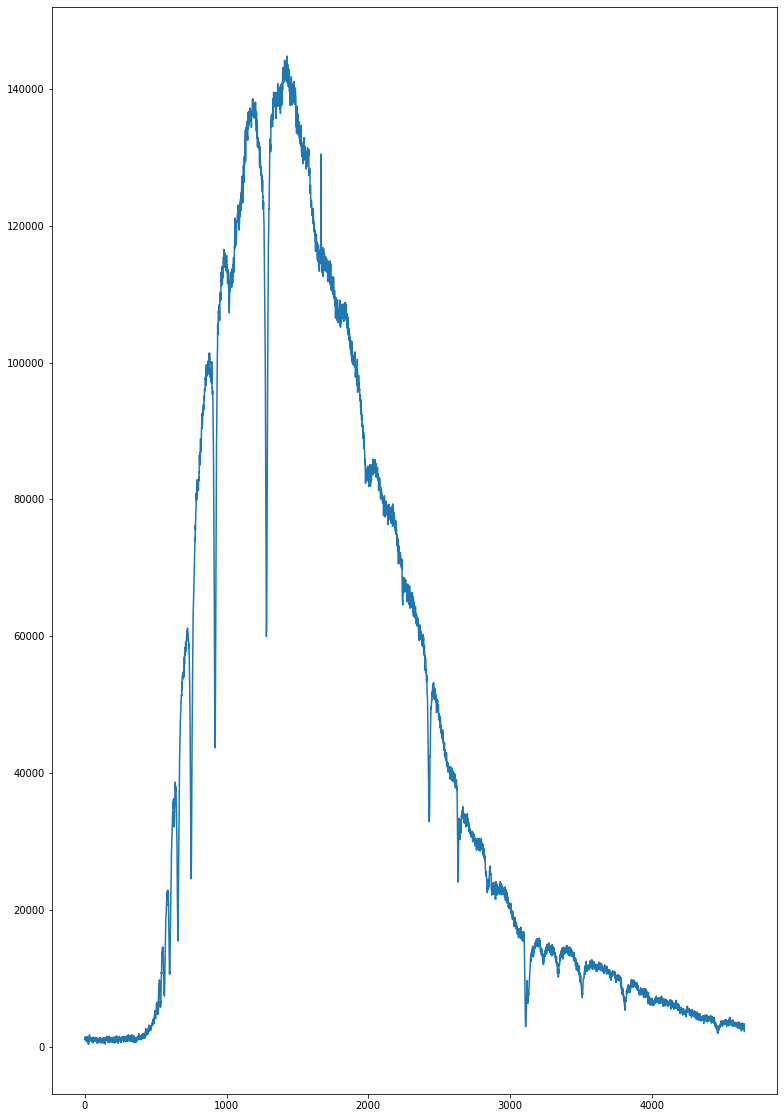

In [12]:
%matplotlib widget
import math
plt.rcParams['figure.figsize'] = [13,20]
xpos = []
ypos = []
#t = np.arange(0.0, 1.0, 0.01)
#s = np.sin(2 * np.pi * t)

pixels = []
with open('pixels.dat','r') as f:
    for line in f:
        pixel = float(line)
        pixels.append(pixel)

instr = []
with open('traces.dat','r') as f:
    for line in f:
        inst = float(line)
        instr.append(inst)
max_i = max(instr)

print ('click (xpos,ypos) pairs with mouse; press [Enter] to leave.')

fig, ax = plt.subplots()

plt.plot(pixels,instr)

cid = fig.canvas.mpl_connect('button_press_event', on_press)
#plt.ylim(-8,-4)
plt.show()

In [5]:
print ("xpos, lambda, identification:")
for xp in xpos:
    print (xp)

xpos, lambda, identification:
126.95239906674783
416.0770603247798
126.95239906674783
558.456437704715
596.5084645360341
652.1229652895008
748.716571861311
912.6329951346861
1281.4449474997798
-72.50712619192541
2429.772514965091


['2429.772514965091', '  6562.793', " 'H-alpha'\n"]
['1281.4449474997798', '  4861.327', " 'H-beta'\n"]
['912.6329951346861', ' 4340.466', " 'H-gamma'\n"]
['748.716571861311', ' 4101.738', " 'H-delta'\n"]
['652.1229652895008', ' 3970.075', " 'H-epsilon'\n"]
['596.5084645360341', '  3888.052', " 'H-zeta'\n"]
['558.456437704715', '  3835.387', " 'H-eta'"]


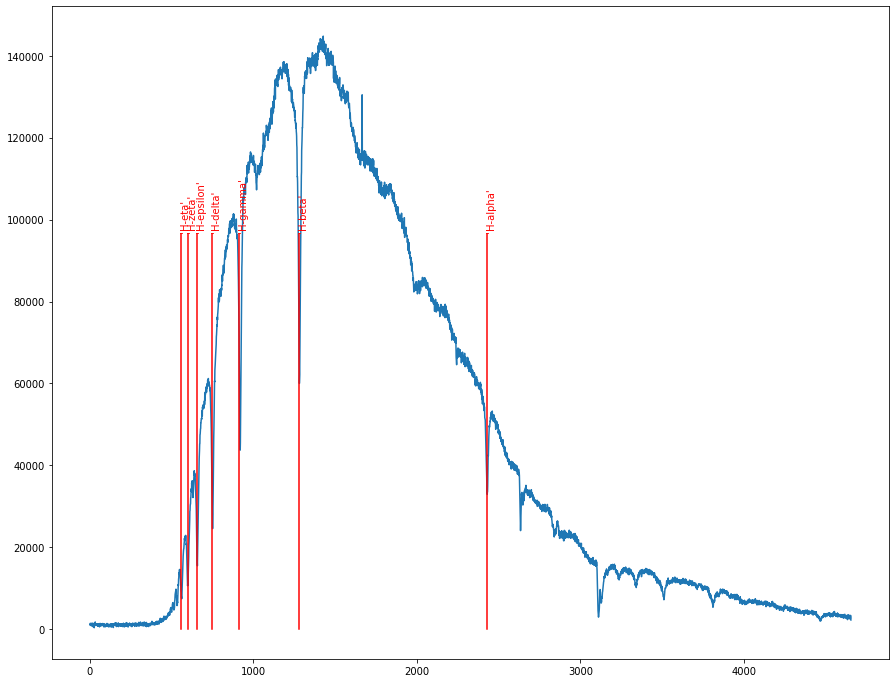

In [22]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [Show.figure_width, Show.figure_height]
xpos = []
ypos = []
#t = np.arange(0.0, 1.0, 0.01)
#s = np.sin(2 * np.pi * t)

pixels = []
with open('pixels.dat','r') as f:
    for line in f:
        pixel = float(line)
        pixels.append(pixel)

instr = []
with open('traces.dat','r') as f:
    for line in f:
        inst = float(line)
        instr.append(inst)
max_i = max(instr)

plt.plot(instr)

identifications = []
positions = []
wavelengths = []
with open('wavelengths.txt', 'r') as f:
    line = f.readline()
    for line in f:
        if line.startswith('#'):
            pass
        else:
            tokens = line.split(',')
            print (tokens)
            if len(tokens) == 3:
                xpos = float(tokens[0])
                positions.append(xpos)
                wavelength = float(tokens[1])
                wavelengths.append(wavelength)
                
                #plt.plot([wavelength,wavelength],[0,2*max_i/3], color='red')
                #plt.text(wavelength, 2*max_i/3, tokens[2], rotation=90, color='red') #,  rotation_mode='anchor')
                plt.plot([xpos,xpos], [0,2*max_i/3], color='red')
                plt.text(xpos, 2*max_i/3, tokens[2], rotation=90, color='red') #,  rotation_mode='anchor')
#plt.xlim(min(wavelengths)*0.9, max(wavelengths)*1.1)

[3.09869524e-05 1.36419456e+00 3.06493149e+03]
558.456437704715 2429.772514965091 3836.4387411950775 6562.554544454313


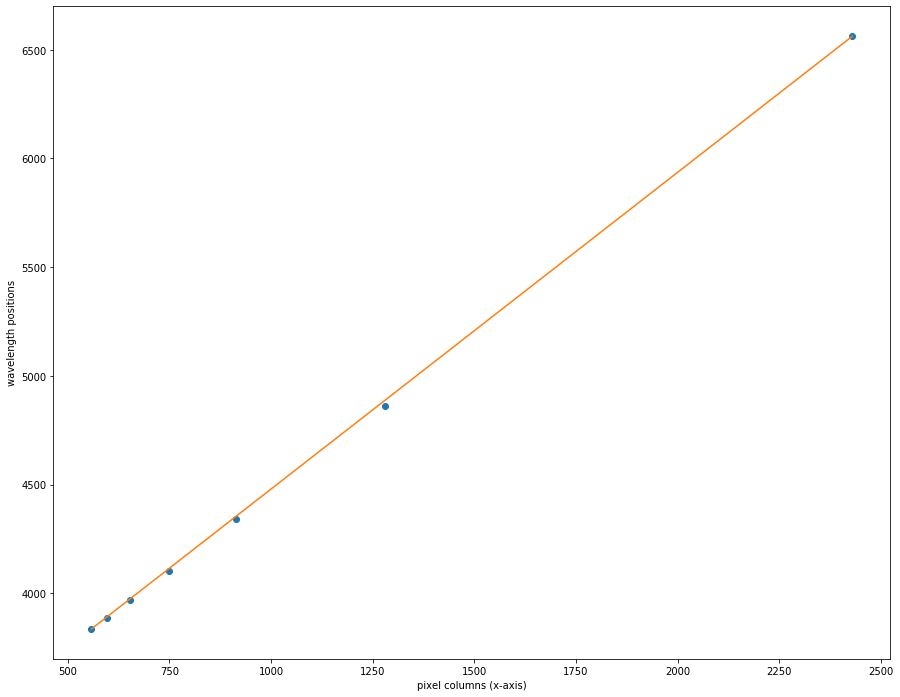

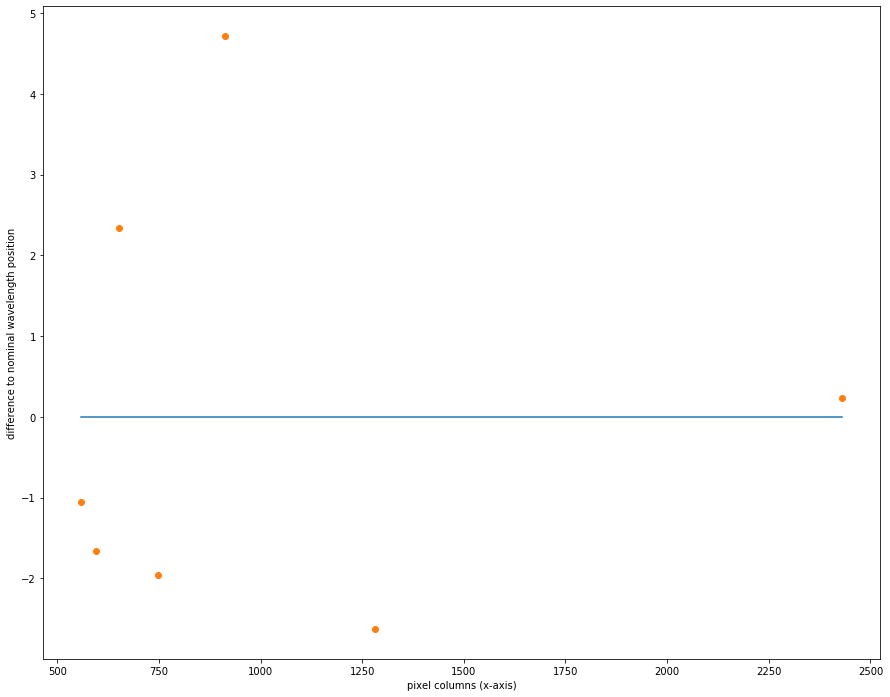

CalibrationData.z:  [3.09869524e-05 1.36419456e+00 3.06493149e+03]


In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [figure_width, figure_height]

x = np.array(positions)
y = np.array(wavelengths)
z = np.polyfit(x,y,2)

print (z)
    
fig, ax = plt.subplots()
plt.plot(positions,wavelengths,'o')

p = np.poly1d(z)


xmin = min(x)
xmax = max(x)
ymin = p(xmin)
ymax = p(xmax)
print (xmin, xmax, ymin, ymax)
plt.plot([xmin,xmax], [ymin, ymax])
plt.xlabel('pixel columns (x-axis)')
plt.ylabel('wavelength positions')
plt.show()

fig, ax = plt.subplots()

d = y
for i in range(0,len(x)):
    d[i] = y[i] - p(x[i])
plt.plot([xmin,xmax],[0,0])
plt.plot(x,d,'o')

plt.xlabel('pixel columns (x-axis)')
plt.ylabel('difference to nominal wavelength position')
plt.show()

CalibrationData.set_z(z)
        